In [1]:
# Test migration history reconstruction on simulated data

import sys
import os

repo_dir = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/"
os.chdir(repo_dir)
from src.lib import vertex_labeling

from src.util import machina_data_extraction_util as mach_util
from src.util import vertex_labeling_util as vert_util
import matplotlib
import torch

SANBORN_DATA_DIR = os.path.join(repo_dir, 'src/data/sanborn_melanoma_2015')


In [8]:

def find_labeling(all_mut_trees_fn, ref_var_fn, custom_colors):    
    ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = mach_util.get_ref_var_matrices_from_real_data(ref_var_fn)
    print(ref_matrix)
    print(var_matrix)
    data = mach_util.get_adj_matrices_from_all_mutation_trees(all_mut_trees_fn, cluster_label_to_idx)
    print("num trees:", len(data))
    
    for adj_matrix, pruned_cluster_label_to_idx in data:
        T = torch.tensor(adj_matrix, dtype = torch.float32)
        B = vert_util.get_mutation_matrix_tensor(T)

        idx_to_label = {v:str(v) for k,v in pruned_cluster_label_to_idx.items()}

        print(unique_sites)   
        primary_idx = unique_sites.index('primary')
        r = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T
        weights = vertex_labeling.Weights(data_fit=1.0, mig=4.0, comig=2.0, seed_site=1.0, l1=1.0, gen_dist=0.0)
        vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, ordered_sites=unique_sites, 
                                                    weights=weights, p=r, node_idx_to_label=idx_to_label, 
                                                    max_iter=150, batch_size=64,
                                                    custom_colors=custom_colors, primary="primary", show_top_trees=True)


        

tensor([[24566.,   106.,  1081.,   397.],
        [44579.,   211.,  1272.,   524.],
        [35250.,   131.,  1112.,   407.],
        [21362.,   164.,   568.,   379.]])
tensor([[14113.,    67.,     0.,     0.],
        [ 4304.,     0.,   106.,     0.],
        [ 8403.,    44.,     0.,    53.],
        [ 9294.,     0.,   249.,     0.]])
num trees: 1
['primary', 'parotid_gland', 'locoregional_1', 'locoregional_2']


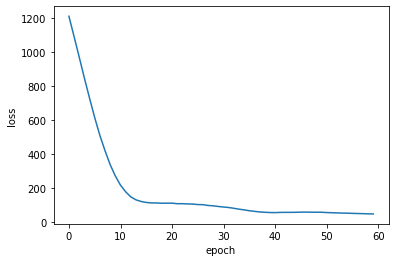

11:14:05 DEBUG

U > 0.05

11:14:05 DEBUG
                norm     0     1     2     3
primary        0.262 0.115 0.557 0.000 0.000
parotid_gland  0.830 0.000 0.000 0.000 0.000
locoregional_1 0.640 0.117 0.055 0.000 0.145
locoregional_2 0.387 0.000 0.000 0.506 0.000
11:14:05 DEBUG

F_hat
11:14:05 DEBUG
tensor([[0.9339, 0.6722, 0.5569, 0.0000, 0.0000],
        [0.8304, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9561, 0.3159, 0.1994, 0.0000, 0.1447],
        [0.8927, 0.5061, 0.0000, 0.5061, 0.0000]])
11:14:05 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


Migration number: 4.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 14.994
L1: 4.0
Loss: 39.994


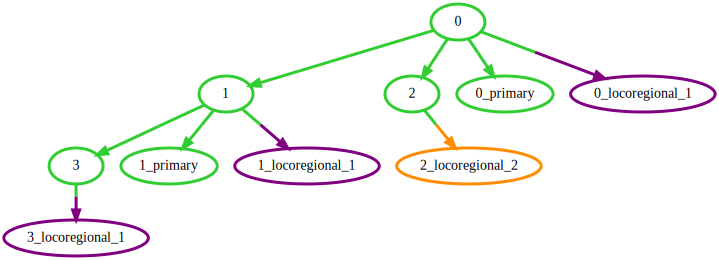

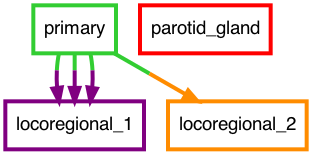

11:14:06 DEBUG

U > 0.05

11:14:06 DEBUG
                norm     0     1     2     3
primary        0.259 0.233 0.414 0.000 0.073
parotid_gland  0.812 0.000 0.000 0.061 0.000
locoregional_1 0.610 0.106 0.113 0.000 0.122
locoregional_2 0.391 0.000 0.000 0.492 0.000
11:14:06 DEBUG

F_hat
11:14:06 DEBUG
tensor([[0.9793, 0.7199, 0.4867, 0.0000, 0.0727],
        [0.8728, 0.0611, 0.0000, 0.0611, 0.0000],
        [0.9510, 0.3415, 0.2355, 0.0000, 0.1223],
        [0.8824, 0.4917, 0.0000, 0.4917, 0.0000]])
11:14:06 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


Migration number: 5.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 13.25
L1: 3.999999761581421
Loss: 44.25


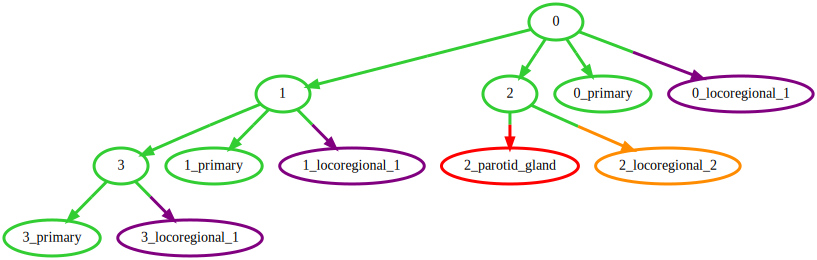

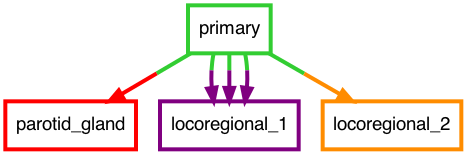

11:14:06 DEBUG

U > 0.05

11:14:06 DEBUG
                norm     0     1     2     3
primary        0.270 0.080 0.626 0.000 0.000
parotid_gland  0.836 0.000 0.000 0.000 0.000
locoregional_1 0.639 0.087 0.109 0.059 0.106
locoregional_2 0.387 0.000 0.000 0.521 0.000
11:14:06 DEBUG

F_hat
11:14:06 DEBUG
tensor([[0.9755, 0.7054, 0.6259, 0.0000, 0.0000],
        [0.8361, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.3610, 0.2150, 0.0589, 0.1057],
        [0.9075, 0.5209, 0.0000, 0.5209, 0.0000]])
11:14:06 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 5.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 15.352
L1: 4.0
Loss: 44.352


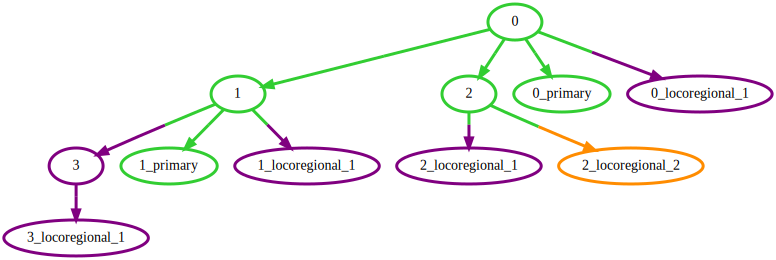

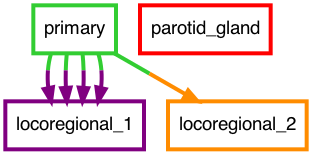

11:14:07 DEBUG

U > 0.05

11:14:07 DEBUG
                norm     0     1     2     3
primary        0.255 0.199 0.418 0.000 0.090
parotid_gland  0.820 0.000 0.000 0.000 0.000
locoregional_1 0.589 0.123 0.155 0.000 0.088
locoregional_2 0.371 0.052 0.000 0.499 0.000
11:14:07 DEBUG

F_hat
11:14:07 DEBUG
tensor([[0.9612, 0.7060, 0.5072, 0.0000, 0.0896],
        [0.8196, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9544, 0.3659, 0.2432, 0.0000, 0.0883],
        [0.9213, 0.5502, 0.0000, 0.4985, 0.0000]])
11:14:07 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 5.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 17.354
L1: 4.0
Loss: 46.354


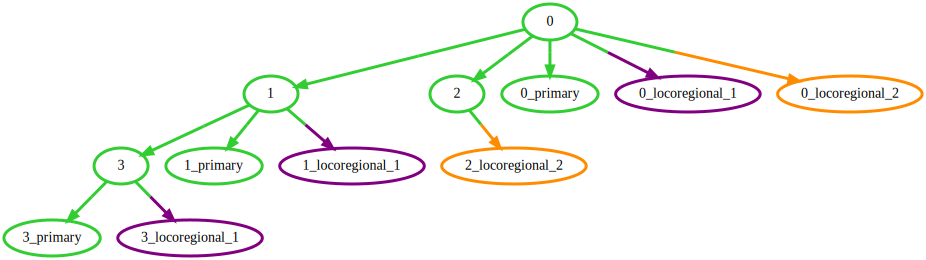

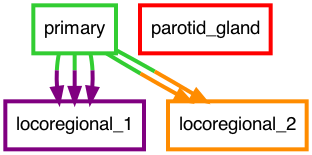

11:14:07 DEBUG

U > 0.05

11:14:07 DEBUG
                norm     0     1     2     3
primary        0.272 0.177 0.498 0.000 0.000
parotid_gland  0.834 0.000 0.000 0.000 0.000
locoregional_1 0.604 0.098 0.108 0.050 0.140
locoregional_2 0.386 0.064 0.000 0.462 0.000
11:14:07 DEBUG

F_hat
11:14:07 DEBUG
tensor([[0.9467, 0.6751, 0.4977, 0.0000, 0.0000],
        [0.8340, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.3957, 0.2477, 0.0504, 0.1398],
        [0.9129, 0.5267, 0.0000, 0.4625, 0.0000]])
11:14:07 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 14.089
L1: 4.0
Loss: 47.089


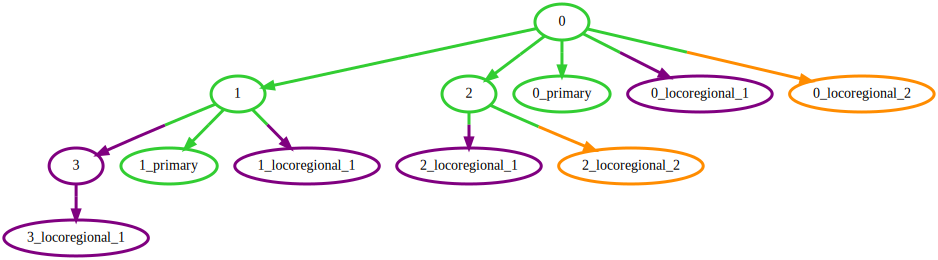

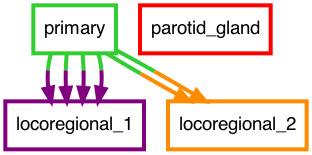

----------------------------------------------------------------------------------------------------



In [9]:
# Patient A
patient = "A"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'red',  'purple', 'darkorange',]]
find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)



tensor([[232357.,   3880.,   4300.,   1260.,   3238.],
        [166433.,   3706.,   4399.,    756.,   3257.],
        [248537.,   3652.,   4987.,   1634.,   3156.]])
tensor([[7.0237e+04, 6.5000e+01, 6.4400e+02, 0.0000e+00, 2.4000e+01],
        [1.1165e+05, 0.0000e+00, 0.0000e+00, 5.0200e+02, 0.0000e+00],
        [7.6776e+04, 7.9500e+02, 0.0000e+00, 0.0000e+00, 6.5700e+02]])
num trees: 1
['primary', 'locoregional_1', 'locoregional_2']


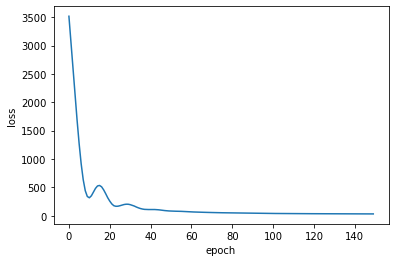

11:26:21 DEBUG

U > 0.05

11:26:21 DEBUG
                norm     0     1     2     3     4
primary        0.536 0.064 0.000 0.279 0.054 0.000
locoregional_1 0.197 0.000 0.000 0.000 0.775 0.000
locoregional_2 0.528 0.000 0.000 0.000 0.000 0.318
11:26:21 DEBUG

F_hat
11:26:21 DEBUG
tensor([[0.9342, 0.3979, 0.0000, 0.2792, 0.0544, 0.0000],
        [0.9720, 0.7751, 0.0000, 0.0000, 0.7751, 0.0000],
        [0.8461, 0.3184, 0.3184, 0.0000, 0.0000, 0.3184]])
11:26:21 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


Migration number: 2.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 12.235
L1: 2.999999523162842
Loss: 28.235


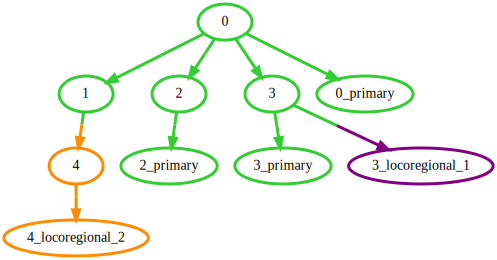

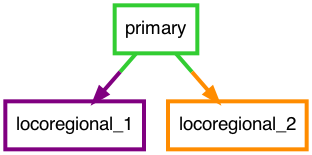

11:26:22 DEBUG

U > 0.05

11:26:22 DEBUG
                norm     0     1     2     3     4
primary        0.536 0.094 0.000 0.282 0.000 0.000
locoregional_1 0.197 0.000 0.000 0.000 0.765 0.000
locoregional_2 0.528 0.000 0.000 0.000 0.000 0.339
11:26:22 DEBUG

F_hat
11:26:22 DEBUG
tensor([[0.9112, 0.3751, 0.0000, 0.2815, 0.0000, 0.0000],
        [0.9617, 0.7651, 0.0000, 0.0000, 0.7651, 0.0000],
        [0.8678, 0.3395, 0.3395, 0.0000, 0.0000, 0.3395]])
11:26:22 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


Migration number: 2.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 12.283
L1: 3.0
Loss: 28.283


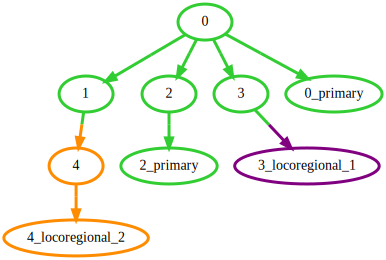

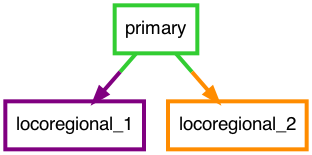

11:26:22 DEBUG

U > 0.05

11:26:22 DEBUG
                norm     0     1     2     3     4
primary        0.536 0.083 0.000 0.285 0.000 0.000
locoregional_1 0.197 0.000 0.000 0.000 0.770 0.000
locoregional_2 0.528 0.000 0.000 0.000 0.000 0.333
11:26:22 DEBUG

F_hat
11:26:22 DEBUG
tensor([[0.9053, 0.3689, 0.0000, 0.2854, 0.0000, 0.0000],
        [0.9668, 0.7701, 0.0000, 0.0000, 0.7701, 0.0000],
        [0.8608, 0.3328, 0.3328, 0.0000, 0.0000, 0.3328]])
11:26:22 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 2.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 12.521
L1: 3.0
Loss: 28.521


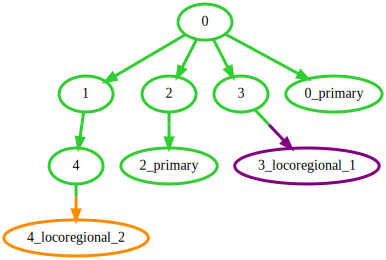

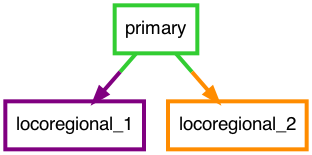

11:26:23 DEBUG

U > 0.05

11:26:23 DEBUG
                norm     0     1     2     3     4
primary        0.536 0.084 0.000 0.275 0.000 0.000
locoregional_1 0.197 0.000 0.000 0.000 0.763 0.000
locoregional_2 0.528 0.000 0.060 0.000 0.000 0.316
11:26:23 DEBUG

F_hat
11:26:23 DEBUG
tensor([[0.8950, 0.3590, 0.0000, 0.2746, 0.0000, 0.0000],
        [0.9595, 0.7628, 0.0000, 0.0000, 0.7628, 0.0000],
        [0.9040, 0.3760, 0.3760, 0.0000, 0.0000, 0.3159]])
11:26:23 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 2.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 12.532
L1: 3.0
Loss: 28.532


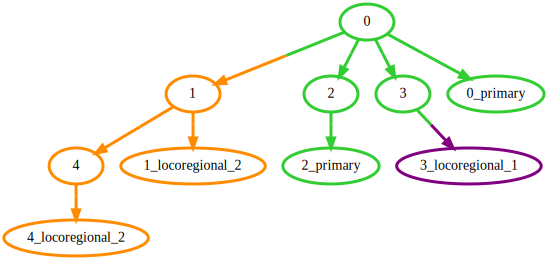

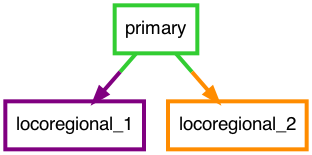

11:26:23 DEBUG

U > 0.05

11:26:23 DEBUG
                norm     0     1     2     3     4
primary        0.536 0.060 0.000 0.282 0.061 0.000
locoregional_1 0.197 0.000 0.000 0.000 0.759 0.000
locoregional_2 0.528 0.000 0.000 0.000 0.000 0.326
11:26:23 DEBUG

F_hat
11:26:23 DEBUG
tensor([[0.9391, 0.4027, 0.0000, 0.2816, 0.0611, 0.0000],
        [0.9560, 0.7594, 0.0000, 0.0000, 0.7594, 0.0000],
        [0.8542, 0.3265, 0.3265, 0.0000, 0.0000, 0.3265]])
11:26:23 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 2.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 12.921
L1: 3.0
Loss: 28.921


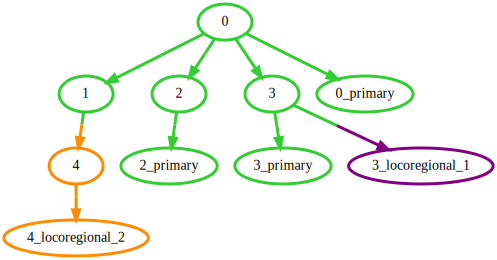

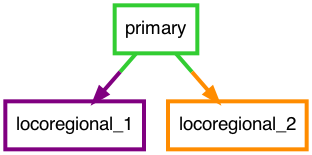

----------------------------------------------------------------------------------------------------



In [10]:
# Patient C
patient = "C"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'purple', 'darkorange']]
find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)



tensor([[2500.,   93.],
        [2446.,   72.],
        [1633.,   59.],
        [1699.,   45.]])
tensor([[ 792.,    0.],
        [ 993.,   44.],
        [1040.,   27.],
        [1280.,   33.]])
num trees: 1
['primary', 'lymph_node', 'locoregional_1', 'locoregional_2']


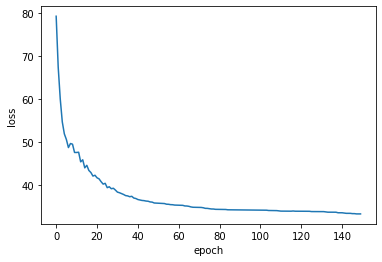

11:12:38 DEBUG

U > 0.05

11:12:38 DEBUG
                norm     0     1
primary        0.519 0.472 0.000
lymph_node     0.416 0.000 0.577
locoregional_1 0.222 0.150 0.628
locoregional_2 0.140 0.000 0.812
11:12:38 DEBUG

F_hat
11:12:38 DEBUG
tensor([[0.9907, 0.4719, 0.0000],
        [0.9931, 0.5767, 0.5767],
        [1.0000, 0.7781, 0.6279],
        [0.9515, 0.8120, 0.8120]])
11:12:38 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


Migration number: 4.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 3.352
L1: 4.0
Loss: 30.352


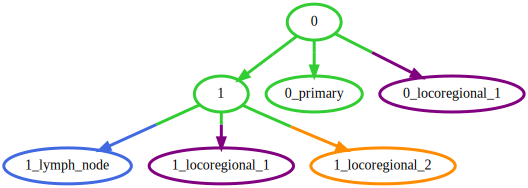

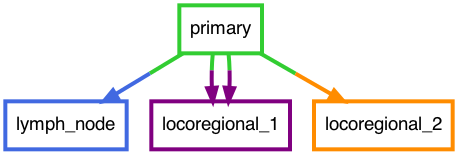

In [5]:
# Patient D
patient = "D"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'royalblue', 'purple', 'darkorange', ]]
find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)


tensor([[ 405., 6259.,  830.,  554., 1823.,   56.,  669.,  664.],
        [ 283., 6938., 1625.,  373., 2186.,   88.,  978.,  890.],
        [ 301., 7570., 1808.,  405., 2468.,   66.,  568.,  986.],
        [ 268., 6399., 1321.,  350., 1367.,   91.,  938.,  822.],
        [ 229., 5991., 1567.,  294., 2072.,   82.,  738.,  484.]])
tensor([[6.0000e+00, 3.8910e+03, 2.9900e+02, 5.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [2.2300e+02, 5.5440e+03, 2.0000e+00, 3.1700e+02, 0.0000e+00, 1.0000e+00,
         1.7000e+01, 2.0000e+00],
        [2.3700e+02, 5.6950e+03, 0.0000e+00, 3.0300e+02, 0.0000e+00, 3.0000e+01,
         1.1000e+02, 1.0000e+00],
        [2.2300e+02, 4.8760e+03, 0.0000e+00, 2.8700e+02, 5.4900e+02, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [2.2000e+02, 4.5750e+03, 0.0000e+00, 2.5100e+02, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 3.9100e+02]])
num trees: 1
['primary', 'locoregional_1', 'locoregional_2', 'lymph_node', 'locoregional_3']


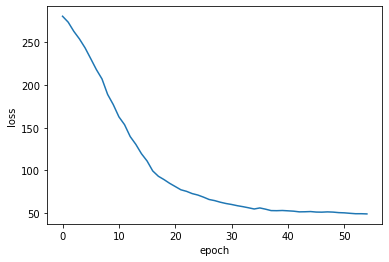

11:26:31 DEBUG

U > 0.05

11:26:31 DEBUG
                norm     0     1     2     3     4     5     6     7
primary        0.236 0.000 0.137 0.588 0.000 0.000 0.000 0.000 0.000
locoregional_1 0.111 0.000 0.000 0.000 0.441 0.000 0.366 0.000 0.000
locoregional_2 0.132 0.000 0.000 0.000 0.187 0.000 0.369 0.288 0.000
lymph_node     0.149 0.000 0.000 0.000 0.000 0.707 0.000 0.000 0.000
locoregional_3 0.123 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.836
11:26:31 DEBUG

F_hat
11:26:31 DEBUG
tensor([[0.9608, 0.0000, 0.7244, 0.5876, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9177, 0.8064, 0.8064, 0.0000, 0.8064, 0.0000, 0.3657, 0.0000, 0.0000],
        [0.9768, 0.8445, 0.8445, 0.0000, 0.8445, 0.0000, 0.3690, 0.2883, 0.0000],
        [0.8561, 0.7071, 0.7071, 0.0000, 0.7071, 0.7071, 0.0000, 0.0000, 0.0000],
        [0.9583, 0.8356, 0.8356, 0.0000, 0.8356, 0.0000, 0.0000, 0.0000, 0.8356]])
11:26:31 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


Migration number: 5.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 4.698
L1: 5.000000476837158
Loss: 39.698


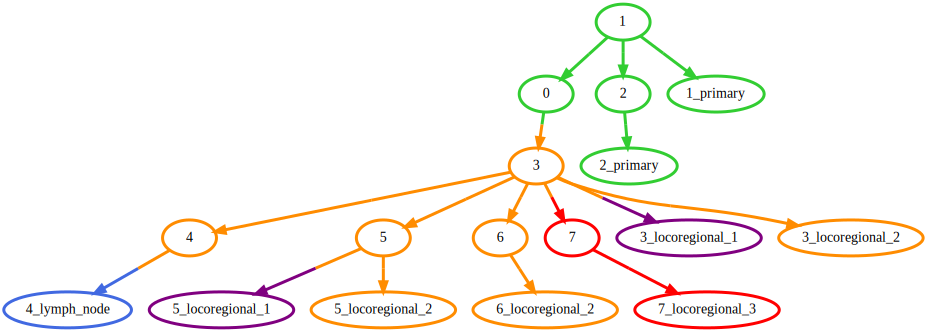

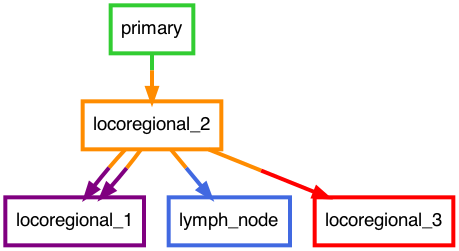

11:26:32 DEBUG

U > 0.05

11:26:32 DEBUG
                norm     0     1     2     3     4     5     6     7
primary        0.244 0.000 0.141 0.582 0.000 0.000 0.000 0.000 0.000
locoregional_1 0.114 0.000 0.000 0.000 0.574 0.000 0.246 0.000 0.000
locoregional_2 0.139 0.000 0.000 0.000 0.097 0.000 0.424 0.321 0.000
lymph_node     0.135 0.000 0.000 0.000 0.080 0.682 0.000 0.000 0.000
locoregional_3 0.121 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.839
11:26:32 DEBUG

F_hat
11:26:32 DEBUG
tensor([[0.9665, 0.0000, 0.7226, 0.5821, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9343, 0.8206, 0.8206, 0.0000, 0.8206, 0.0000, 0.2463, 0.0000, 0.0000],
        [0.9809, 0.8421, 0.8421, 0.0000, 0.8421, 0.0000, 0.4242, 0.3209, 0.0000],
        [0.8970, 0.7624, 0.7624, 0.0000, 0.7624, 0.6820, 0.0000, 0.0000, 0.0000],
        [0.9600, 0.8394, 0.8394, 0.0000, 0.8394, 0.0000, 0.0000, 0.0000, 0.8394]])
11:26:32 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


Migration number: 6.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 4.218
L1: 4.999999523162842
Loss: 43.218


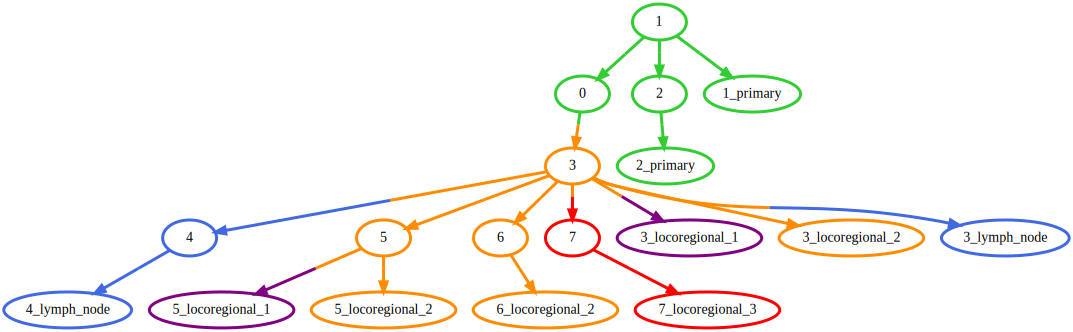

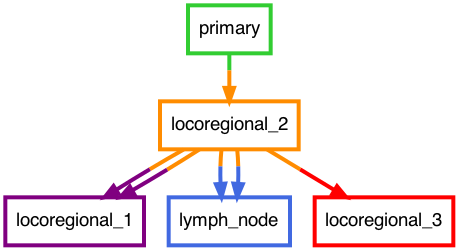

11:26:32 DEBUG

U > 0.05

11:26:32 DEBUG
                norm     0     1     2     3     4     5     6     7
primary        0.237 0.000 0.135 0.598 0.000 0.000 0.000 0.000 0.000
locoregional_1 0.110 0.000 0.000 0.000 0.603 0.000 0.208 0.000 0.000
locoregional_2 0.134 0.000 0.000 0.000 0.160 0.000 0.379 0.302 0.000
lymph_node     0.135 0.000 0.000 0.000 0.091 0.680 0.000 0.000 0.000
locoregional_3 0.122 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.831
11:26:32 DEBUG

F_hat
11:26:32 DEBUG
tensor([[0.9694, 0.0000, 0.7329, 0.5979, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9211, 0.8116, 0.8116, 0.0000, 0.8116, 0.0000, 0.2084, 0.0000, 0.0000],
        [0.9742, 0.8399, 0.8399, 0.0000, 0.8399, 0.0000, 0.3785, 0.3016, 0.0000],
        [0.9057, 0.7704, 0.7704, 0.0000, 0.7704, 0.6799, 0.0000, 0.0000, 0.0000],
        [0.9532, 0.8315, 0.8315, 0.0000, 0.8315, 0.0000, 0.0000, 0.0000, 0.8315]])
11:26:32 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 4.286
L1: 5.0
Loss: 43.286


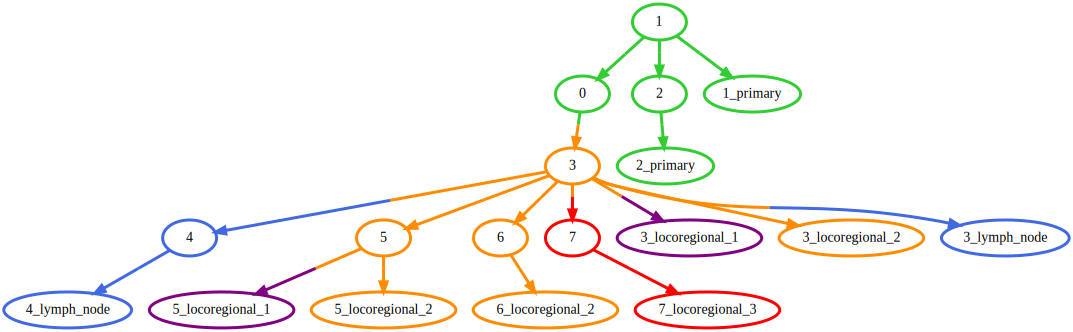

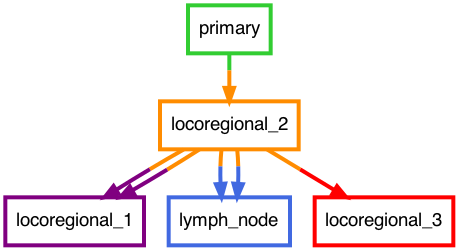

11:26:33 DEBUG

U > 0.05

11:26:33 DEBUG
                norm     0     1     2     3     4     5     6     7
primary        0.242 0.000 0.136 0.582 0.000 0.000 0.000 0.000 0.000
locoregional_1 0.109 0.000 0.000 0.000 0.368 0.000 0.440 0.000 0.000
locoregional_2 0.137 0.000 0.000 0.000 0.174 0.000 0.375 0.296 0.000
lymph_node     0.142 0.000 0.000 0.000 0.125 0.640 0.000 0.000 0.000
locoregional_3 0.121 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.834
11:26:33 DEBUG

F_hat
11:26:33 DEBUG
tensor([[0.9599, 0.0000, 0.7180, 0.5822, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9169, 0.8075, 0.8075, 0.0000, 0.8075, 0.0000, 0.4396, 0.0000, 0.0000],
        [0.9814, 0.8443, 0.8443, 0.0000, 0.8443, 0.0000, 0.3745, 0.2959, 0.0000],
        [0.9068, 0.7649, 0.7649, 0.0000, 0.7649, 0.6395, 0.0000, 0.0000, 0.0000],
        [0.9549, 0.8344, 0.8344, 0.0000, 0.8344, 0.0000, 0.0000, 0.0000, 0.8344]])
11:26:33 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 4.441
L1: 5.0
Loss: 43.441


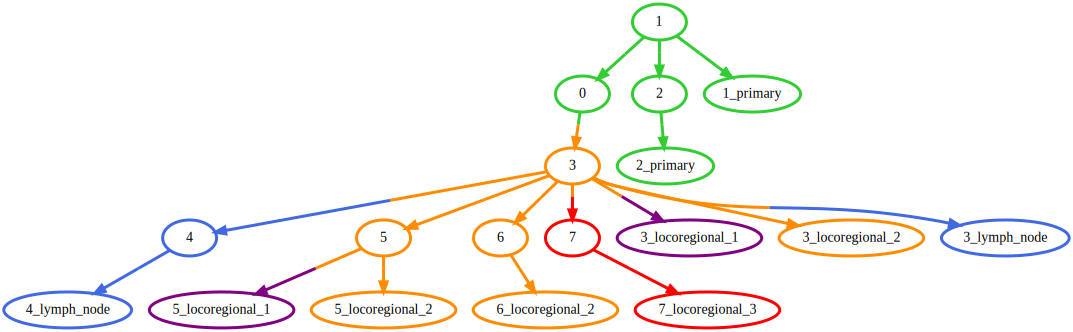

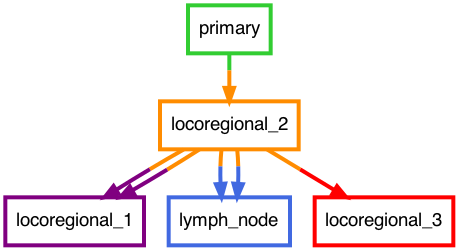

11:26:33 DEBUG

U > 0.05

11:26:33 DEBUG
                norm     0     1     2     3     4     5     6     7
primary        0.248 0.000 0.143 0.575 0.000 0.000 0.000 0.000 0.000
locoregional_1 0.114 0.000 0.000 0.000 0.352 0.000 0.442 0.000 0.000
locoregional_2 0.135 0.000 0.000 0.000 0.175 0.000 0.386 0.281 0.000
lymph_node     0.136 0.000 0.000 0.000 0.101 0.672 0.000 0.000 0.000
locoregional_3 0.119 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.811
11:26:33 DEBUG

F_hat
11:26:33 DEBUG
tensor([[0.9654, 0.0000, 0.7179, 0.5748, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9077, 0.7936, 0.7936, 0.0000, 0.7936, 0.0000, 0.4415, 0.0000, 0.0000],
        [0.9769, 0.8416, 0.8416, 0.0000, 0.8416, 0.0000, 0.3856, 0.2814, 0.0000],
        [0.9090, 0.7730, 0.7730, 0.0000, 0.7730, 0.6721, 0.0000, 0.0000, 0.0000],
        [0.9301, 0.8113, 0.8113, 0.0000, 0.8113, 0.0000, 0.0000, 0.0000, 0.8113]])
11:26:33 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 4.67
L1: 4.999999523162842
Loss: 43.67


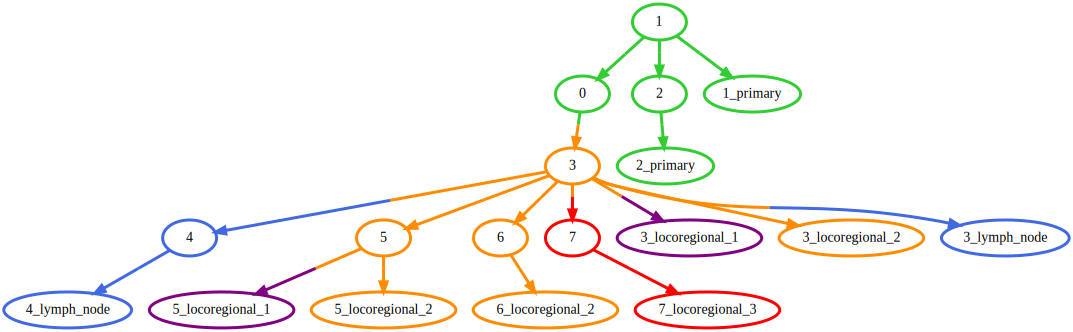

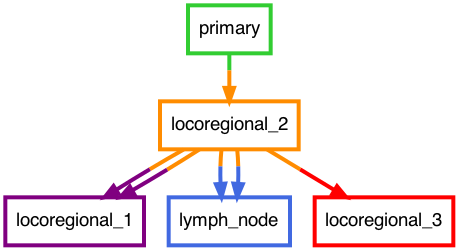

----------------------------------------------------------------------------------------------------



In [11]:
# Patient E
patient = "E"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'purple', 'darkorange', 'royalblue', 'red', ]]
find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)

tensor([[3.6425e+05, 1.9400e+02, 2.4200e+02, 7.0200e+02, 4.9900e+02],
        [4.1847e+05, 2.7600e+02, 2.1300e+02, 8.4100e+02, 6.2600e+02],
        [3.8240e+05, 2.0100e+02, 1.3900e+02, 4.9800e+02, 2.9500e+02],
        [3.8090e+05, 2.4700e+02, 1.8100e+02, 5.9700e+02, 5.3300e+02]])
tensor([[1.6642e+05, 3.4000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4787e+05, 0.0000e+00, 6.1000e+01, 0.0000e+00, 2.0000e+00],
        [8.3684e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.3000e+01],
        [1.3414e+05, 0.0000e+00, 5.7000e+01, 9.4000e+01, 0.0000e+00]])
num trees: 1
['primary', 'lymph_node', 'locoregional', 'distant']


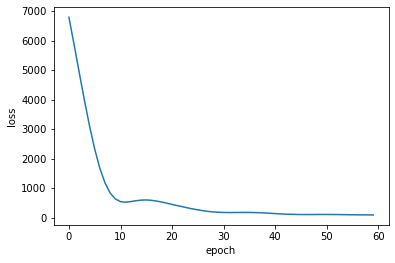

11:12:57 DEBUG

U > 0.05

11:12:57 DEBUG
              norm     0     1     2     3     4
primary      0.363 0.134 0.150 0.137 0.096 0.120
lymph_node   0.482 0.097 0.090 0.142 0.127 0.061
locoregional 0.642 0.102 0.066 0.000 0.096 0.000
distant      0.474 0.096 0.110 0.085 0.158 0.078
11:12:57 DEBUG

F_hat
11:12:57 DEBUG
tensor([[1.0000, 0.6375, 0.1502, 0.2328, 0.0958, 0.1203],
        [1.0000, 0.5184, 0.0901, 0.2695, 0.1272, 0.0614],
        [0.9058, 0.2639, 0.0659, 0.0955, 0.0955, 0.0000],
        [1.0000, 0.5256, 0.1101, 0.2422, 0.1577, 0.0776]])
11:12:57 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


Migration number: 13.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 24.935
L1: 4.0
Loss: 87.935


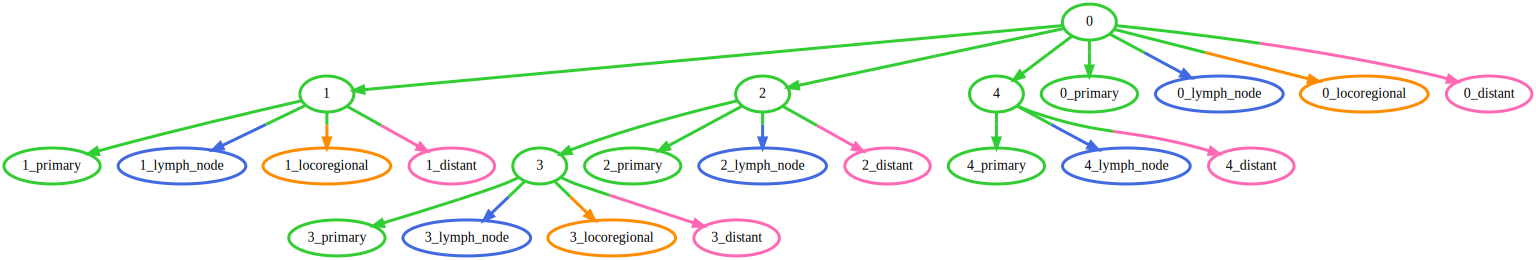

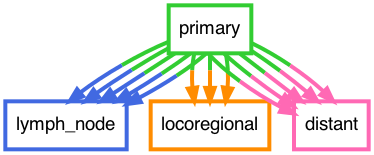

In [7]:
# Patient F
patient = "F"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'royalblue', 'darkorange', 'hotpink']]
find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)

